<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Regresi%C3%B3n_Lineal/R_Simple/Hotel_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Mexico_Outliers_y_Categorización.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)


,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(2 - 5) Reseñas mensuales moderadas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
#Realizamos un conteo de los tipos de habitaciones
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,17432
Private room,2,8581
Shared room,3,401
Hotel room,1,122


In [4]:
#Realizamos un frame con las variables a utilizar
df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [5]:
df1["room_type_num"].value_counts()

,count
room_type_num,
0,17432
2,8581
3,401
1,122


## División del frame por tipo de habitación

Hotel room/apt no. 1

In [6]:
df_Hotel=df1[df1["room_type_num"]== 1]
df_Hotel

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,1,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,1,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,1,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,1,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,1,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...
24761,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,1,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,1,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


# Filtro de “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

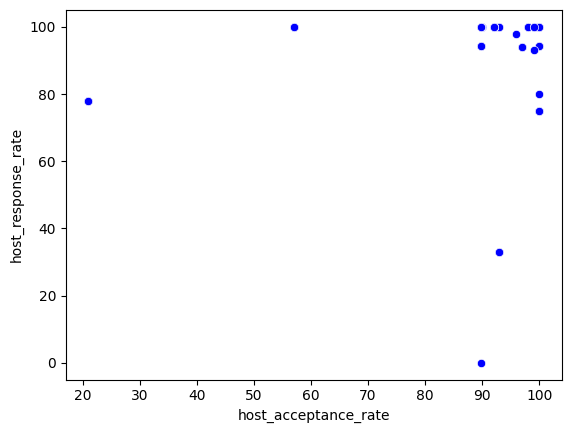

In [7]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='host_response_rate', color="blue", data=df_Hotel)

In [8]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Hotel[['host_acceptance_rate']]
var_Dep= df_Hotel['host_response_rate']

In [9]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [10]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [12]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.11840922]),
 'rank_': 1,
 'singular_': array([171.57139889]),
 'intercept_': 81.14915507407756}

**Modelo matemático: Y = 0.11840922x + 81.14915507407756**




In [13]:
#Predecimos los valores de host_response_rate a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Hotel[['host_acceptance_rate']])
y_pred

array([92.0428032 , 92.0428032 , 92.75325851, 92.75325851, 91.80598476,
       91.80598476, 91.80598476, 91.80598476, 92.87166773, 83.63574867,
       92.51644007, 83.63574867, 83.63574867, 92.99007695, 92.99007695,
       92.16121241, 92.99007695, 83.63574867, 92.99007695, 91.78230291,
       92.75325851, 92.75325851, 92.75325851, 92.75325851, 92.75325851,
       92.99007695, 92.16121241, 92.99007695, 92.99007695, 92.99007695,
       92.99007695, 92.99007695, 92.99007695, 92.99007695, 92.99007695,
       92.99007695, 92.99007695, 92.99007695, 92.99007695, 92.99007695,
       92.99007695, 92.16121241, 92.99007695, 92.99007695, 92.99007695,
       92.75325851, 92.99007695, 92.99007695, 92.99007695, 92.99007695,
       92.99007695, 92.16121241, 92.16121241, 91.78230291, 92.99007695,
       92.0428032 , 92.0428032 , 92.0428032 , 92.0428032 , 92.99007695,
       92.99007695, 92.0428032 , 92.99007695, 92.99007695, 92.99007695,
       92.99007695, 92.99007695, 87.89848054, 87.89848054, 92.87

In [14]:
#Insertamos la columna de predicciones en el DataFrame
df_Hotel.insert(0, 'Predict1', y_pred)
df_Hotel

,Predict1,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,92.042803,1,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,92.042803,1,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,92.753259,1,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,92.753259,1,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,91.805985,1,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
24761,91.782303,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,91.782303,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,91.782303,1,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,91.782303,1,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

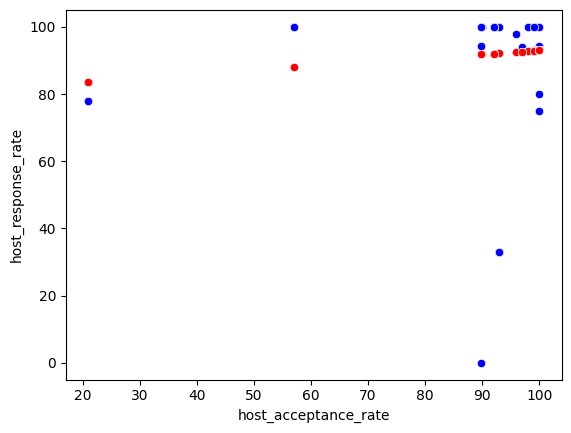

In [15]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color='blue', data=df_Hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predict1', color='red', data=df_Hotel)


In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.014181707906701257

In [17]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.11908697622620727

## Filtro de "“host_acceptance_rate vs price”

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

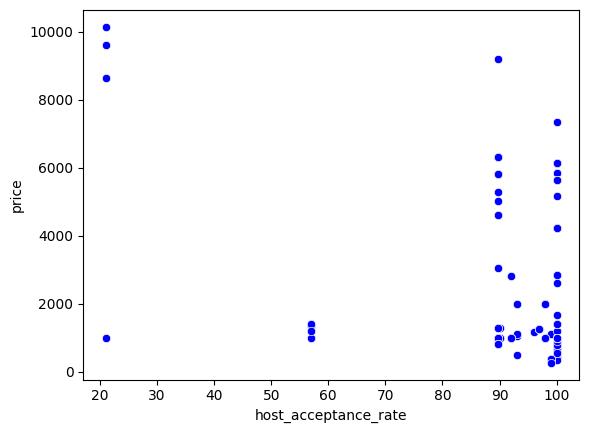

In [18]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='price', color="blue", data=df_Hotel)

In [19]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Hotel[['host_acceptance_rate']]
var_Dep= df_Hotel['price']

In [20]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [21]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [22]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [23]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-52.32739037]),
 'rank_': 1,
 'singular_': array([171.57139889]),
 'intercept_': 7272.663597204575}

**Modelo matemático: Y = -52.32739037x + 7272.663597204575**

In [24]:
#Predecimos los valores de price a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Hotel[['host_acceptance_rate']])
y_pred

array([2458.54368293, 2458.54368293, 2144.5793407 , 2144.5793407 ,
       2563.19846368, 2563.19846368, 2563.19846368, 2563.19846368,
       2092.25195032, 6173.78839938, 2249.23412144, 6173.78839938,
       6173.78839938, 2039.92455995, 2039.92455995, 2406.21629256,
       2039.92455995, 6173.78839938, 2039.92455995, 2573.66394175,
       2144.5793407 , 2144.5793407 , 2144.5793407 , 2144.5793407 ,
       2144.5793407 , 2039.92455995, 2406.21629256, 2039.92455995,
       2039.92455995, 2039.92455995, 2039.92455995, 2039.92455995,
       2039.92455995, 2039.92455995, 2039.92455995, 2039.92455995,
       2039.92455995, 2039.92455995, 2039.92455995, 2039.92455995,
       2039.92455995, 2406.21629256, 2039.92455995, 2039.92455995,
       2039.92455995, 2144.5793407 , 2039.92455995, 2039.92455995,
       2039.92455995, 2039.92455995, 2039.92455995, 2406.21629256,
       2406.21629256, 2573.66394175, 2039.92455995, 2458.54368293,
       2458.54368293, 2458.54368293, 2458.54368293, 2039.92455

In [25]:
#Insertamos la columna de predicciones en el DataFrame
df_Hotel.insert(1, 'Predict2', y_pred)
df_Hotel

,Predict1,Predict2,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,92.042803,2458.543683,1,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,92.042803,2458.543683,1,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,92.753259,2144.579341,1,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,92.753259,2144.579341,1,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,91.805985,2563.198464,1,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,91.782303,2573.663942,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,91.782303,2573.663942,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,91.782303,2573.663942,1,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,91.782303,2573.663942,1,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

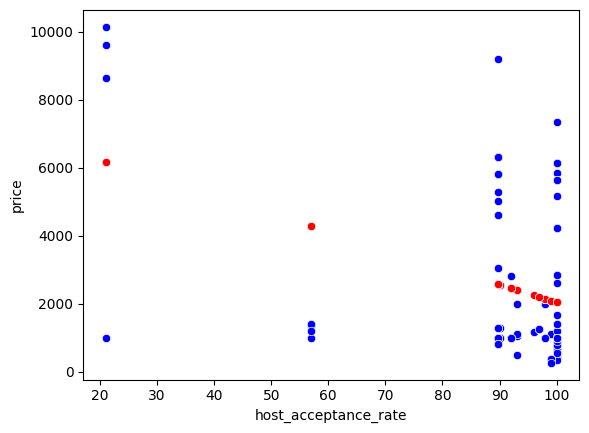

In [26]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=df_Hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predict2', color='red', data=df_Hotel)


In [27]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.12102933588274001

In [28]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.34789270742966144

## Filtro para “host_acceptance_rate vs number_of_reviews ”

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

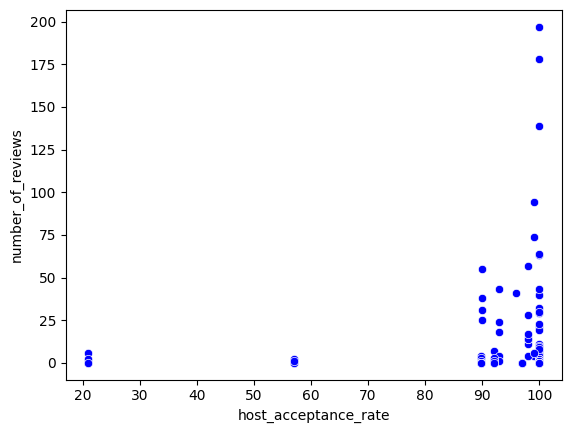

In [29]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'host_acceptance_rate', y='number_of_reviews', color="blue", data=df_Hotel)

In [30]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Hotel[['host_acceptance_rate']]
var_Dep= df_Hotel['number_of_reviews']

In [31]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [32]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [33]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [34]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29373091]),
 'rank_': 1,
 'singular_': array([171.57139889]),
 'intercept_': -13.394256216319008}

**Modelo matemático: y = 0.29373091x -13.394256216319008**

In [35]:
#Predecimos los valores de number_of_reviews a partir de la variable host_acceptance_rate
y_pred= model.predict(X=df_Hotel[['host_acceptance_rate']])
y_pred

array([13.6289878 , 13.6289878 , 15.39137328, 15.39137328, 13.04152597,
       13.04152597, 13.04152597, 13.04152597, 15.68510419, -7.22590704,
       14.80391145, -7.22590704, -7.22590704, 15.97883511, 15.97883511,
       13.92271871, 15.97883511, -7.22590704, 15.97883511, 12.98277979,
       15.39137328, 15.39137328, 15.39137328, 15.39137328, 15.39137328,
       15.97883511, 13.92271871, 15.97883511, 15.97883511, 15.97883511,
       15.97883511, 15.97883511, 15.97883511, 15.97883511, 15.97883511,
       15.97883511, 15.97883511, 15.97883511, 15.97883511, 15.97883511,
       15.97883511, 13.92271871, 15.97883511, 15.97883511, 15.97883511,
       15.39137328, 15.97883511, 15.97883511, 15.97883511, 15.97883511,
       15.97883511, 13.92271871, 13.92271871, 12.98277979, 15.97883511,
       13.6289878 , 13.6289878 , 13.6289878 , 13.6289878 , 15.97883511,
       15.97883511, 13.6289878 , 15.97883511, 15.97883511, 15.97883511,
       15.97883511, 15.97883511,  3.34840584,  3.34840584, 15.68

In [36]:
#Insertamos la columna de predicciones en el DataFrame
df_Hotel.insert(2, 'Predict3', y_pred)
df_Hotel

,Predict1,Predict2,Predict3,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,92.042803,2458.543683,13.628988,1,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,92.042803,2458.543683,13.628988,1,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,92.753259,2144.579341,15.391373,1,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,92.753259,2144.579341,15.391373,1,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,91.805985,2563.198464,13.041526,1,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,91.782303,2573.663942,12.982780,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,91.782303,2573.663942,12.982780,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,91.782303,2573.663942,12.982780,1,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,91.782303,2573.663942,12.982780,1,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

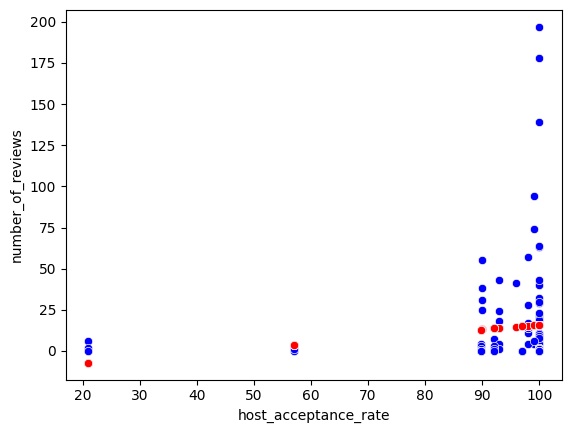

In [37]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color='blue', data=df_Hotel)
sns.scatterplot(x='host_acceptance_rate', y='Predict3', color='red', data=df_Hotel)

In [38]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.02211737628906285

In [39]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.14871911877449667

# Filtro de "“review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

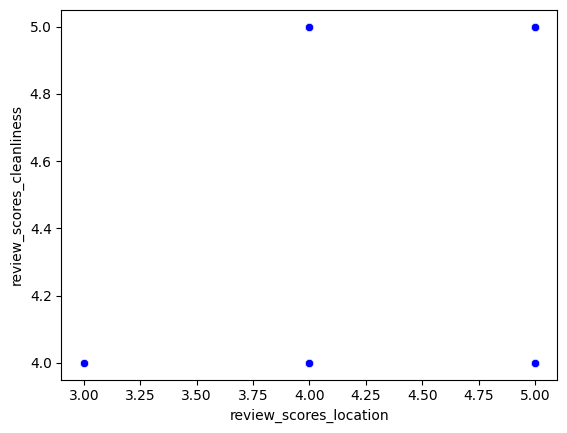

In [40]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'review_scores_location', y='review_scores_cleanliness', color="blue", data=df_Hotel)

In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Hotel[['review_scores_location']]
var_Dep= df_Hotel['review_scores_cleanliness']

In [42]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [43]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [44]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [45]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.46163683]),
 'rank_': 1,
 'singular_': array([3.58045697]),
 'intercept_': 2.647058823529411}

**Modelo matemático: Y = 0.46163683x +  2.647058823529411**

In [46]:
#Predecimos los valores de review_scores_cleanliness a partir de la variable review_scores_location
y_pred= model.predict(X=df_Hotel[['review_scores_location']])
y_pred

array([4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.49360614,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.49360614, 4.95524297, 4.95524297, 4.49360614,
       4.95524297, 4.49360614, 4.49360614, 4.95524297, 4.49360614,
       4.03196931, 4.49360614, 4.95524297, 4.49360614, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.49360614, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524297,
       4.95524297, 4.95524297, 4.95524297, 4.95524297, 4.95524

In [47]:
#Insertamos la columna de predicciones en el DataFrame
df_Hotel.insert(3, 'Predict4', y_pred)
df_Hotel

,Predict1,Predict2,Predict3,Predict4,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,92.042803,2458.543683,13.628988,4.955243,1,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,92.042803,2458.543683,13.628988,4.955243,1,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,92.753259,2144.579341,15.391373,4.955243,1,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,92.753259,2144.579341,15.391373,4.955243,1,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,91.805985,2563.198464,13.041526,4.955243,1,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,91.782303,2573.663942,12.982780,4.955243,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,91.782303,2573.663942,12.982780,4.955243,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,91.782303,2573.663942,12.982780,4.955243,1,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,91.782303,2573.663942,12.982780,4.955243,1,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

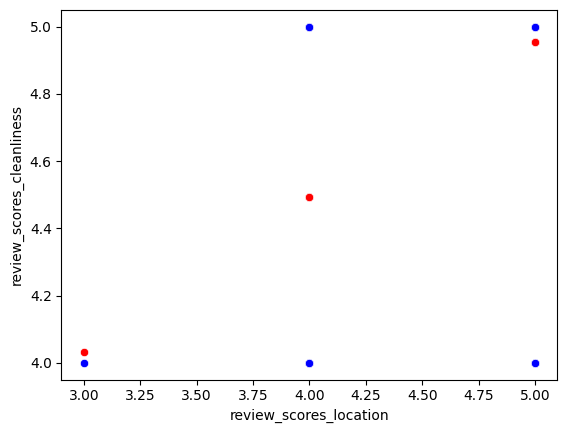

In [48]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=df_Hotel)
sns.scatterplot(x='review_scores_location', y='Predict4', color='red', data=df_Hotel)


In [49]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.27297443921484843

In [50]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.5224695581704722

# Filtro para “availability_365 vs number_of_reviews”

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

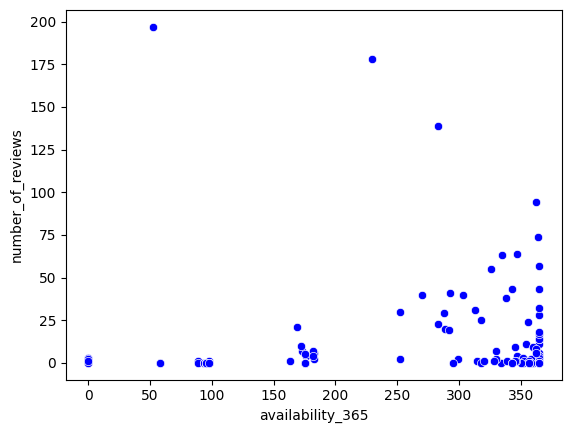

In [51]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'availability_365', y='number_of_reviews', color="blue", data=df_Hotel)

In [52]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Hotel[['availability_365']]
var_Dep= df_Hotel['number_of_reviews']

In [53]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [54]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [55]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [56]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.02219522]),
 'rank_': 1,
 'singular_': array([1310.21082023]),
 'intercept_': 8.118047901770238}

**Modelo matemático: Y = 0.02219522x + 8.118047901770238**

In [57]:
#Predecimos los valores de number_of_reviews a partir de la variable availability_365
y_pred= model.predict(X=df_Hotel[['availability_365']])
y_pred

array([15.44247009, 11.73586856, 16.21930275, 16.21930275, 15.17612747,
       15.06515137, 15.35368922, 15.62003184, 12.0244064 , 16.21930275,
       14.621247  , 16.21930275, 16.21930275, 15.55344619, 14.39929481,
       16.01954578, 16.21930275, 16.21930275, 15.97515534, 10.09342237,
       16.21930275, 16.21930275, 16.21930275, 16.21930275, 16.21930275,
       15.81978881, 15.81978881,  9.27219928, 13.22294822, 12.17977294,
       12.17977294, 16.10832666, 12.15757772, 11.95782075, 12.00221119,
        8.1180479 , 11.93562553, 16.13052187,  8.1180479 , 12.15757772,
       11.86903987, 16.21930275, 15.77539837, 15.10954181, 14.51027091,
       16.21930275,  8.1180479 , 15.53125097, 14.75441831, 16.15271709,
       15.44247009, 16.21930275, 15.88637447,  8.1180479 , 14.11075697,
       15.39807966, 15.93076491, 15.93076491, 15.95296012, 14.66563744,
       16.15271709, 16.10832666, 14.53246612, 14.59905178, 14.84319919,
       13.71124303, 13.71124303, 15.88637447, 16.06393622, 16.19

In [58]:
#Insertamos la columna de predicciones en el DataFrame
df_Hotel.insert(4, 'Predict5', y_pred)
df_Hotel

,Predict1,Predict2,Predict3,Predict4,Predict5,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,92.042803,2458.543683,13.628988,4.955243,15.442470,1,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,92.042803,2458.543683,13.628988,4.955243,11.735869,1,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,92.753259,2144.579341,15.391373,4.955243,16.219303,1,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,92.753259,2144.579341,15.391373,4.955243,16.219303,1,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,91.805985,2563.198464,13.041526,4.955243,15.176127,1,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,91.782303,2573.663942,12.982780,4.955243,9.405371,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,91.782303,2573.663942,12.982780,4.955243,9.405371,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,91.782303,2573.663942,12.982780,4.955243,12.002211,1,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,91.782303,2573.663942,12.982780,4.955243,12.002211,1,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

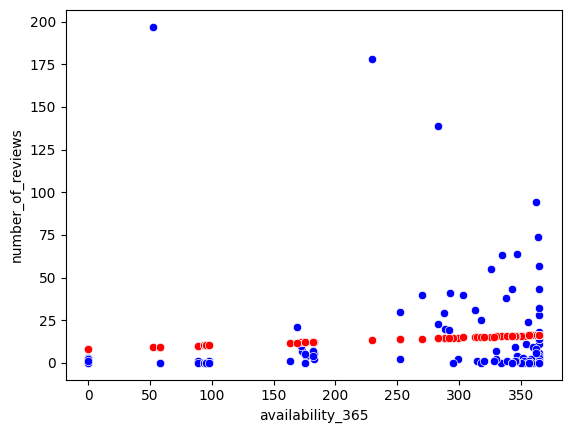

In [59]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='availability_365', y='number_of_reviews', color='blue', data=df_Hotel)
sns.scatterplot(x='availability_365', y='Predict5', color='red', data=df_Hotel)

In [60]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.007364541847907247

In [61]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.08581690886944861

# Filtro para “reviews_per_month vs review_scores_communication”

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

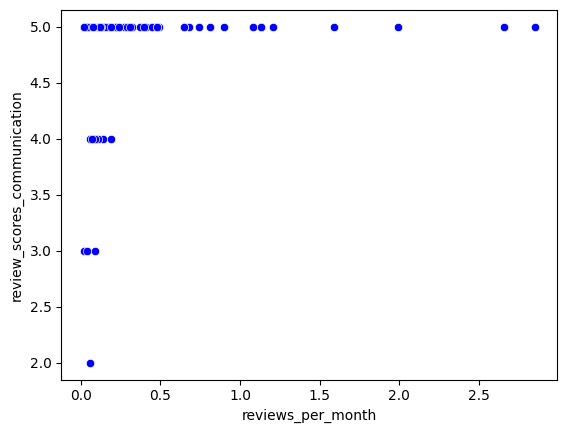

In [62]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x = 'reviews_per_month', y='review_scores_communication', color="blue", data=df_Hotel)

In [63]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= df_Hotel[['reviews_per_month']]
var_Dep= df_Hotel['review_scores_communication']

In [64]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [65]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [66]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=var_Dep)

LinearRegression()

In [67]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.23170636]),
 'rank_': 1,
 'singular_': array([6.27788266]),
 'intercept_': 4.718794102017642}

**Modelo matemático: Y = 0.23170636x + 4.718794102017642**

In [68]:
#Predecimos los valores de review_scores_communication a partir de la variable reviews_per_month
y_pred= model.predict(X=df_Hotel[['reviews_per_month']])
y_pred

array([4.73269648, 4.72342823, 4.7697695 , 4.82306196, 4.76050125,
       4.7697695 , 4.82537903, 4.80452546, 4.73269648, 4.73269648,
       4.81379371, 4.98062229, 4.72574529, 4.87635443, 5.17988976,
       4.78135482, 4.83233022, 4.98062229, 4.75123299, 4.72342823,
       4.76050125, 4.75123299, 4.76050125, 4.76281831, 4.7697695 ,
       4.92732983, 4.73269648, 5.37915723, 5.33513302, 4.73964767,
       4.73501355, 4.75123299, 4.7442818 , 4.7442818 , 4.73964767,
       4.73964767, 4.79062307, 4.72342823, 4.72806236, 4.75355006,
       4.79294014, 4.90647625, 4.76281831, 4.72342823, 4.82306196,
       4.73733061, 4.98062229, 4.98062229, 4.72574529, 4.74891593,
       4.72574529, 4.78598895, 4.83001316, 4.98062229, 4.86940324,
       4.73037942, 4.98062229, 4.73269648, 4.72342823, 4.98062229,
       4.74659887, 4.98062229, 4.79294014, 4.79062307, 4.86940324,
       4.72574529, 4.83001316, 4.98062229, 4.98062229, 4.9991588 ,
       4.98062229, 4.72806236, 4.72574529, 4.73037942, 4.72342

In [69]:
#Insertamos la columna de predicciones en el DataFrame
df_Hotel.insert(5, 'Predict6', y_pred)
df_Hotel

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,92.042803,2458.543683,13.628988,4.955243,15.442470,4.732696,1,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,92.042803,2458.543683,13.628988,4.955243,11.735869,4.723428,1,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,92.753259,2144.579341,15.391373,4.955243,16.219303,4.769770,1,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,92.753259,2144.579341,15.391373,4.955243,16.219303,4.823062,1,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,91.805985,2563.198464,13.041526,4.955243,15.176127,4.760501,1,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,91.782303,2573.663942,12.982780,4.955243,9.405371,4.980622,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,91.782303,2573.663942,12.982780,4.955243,9.405371,4.980622,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,91.782303,2573.663942,12.982780,4.955243,12.002211,4.980622,1,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,91.782303,2573.663942,12.982780,4.955243,12.002211,4.980622,1,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

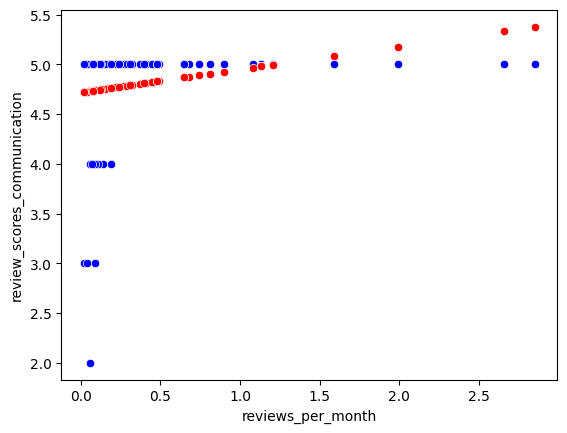

In [70]:
#Visualizamos la gráica comparativa

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='blue', data=df_Hotel)
sns.scatterplot(x='reviews_per_month', y='Predict6', color='red', data=df_Hotel)

In [71]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo (R cuadrada)
coef_Deter=model.score(X=Vars_Indep, y=var_Dep)
coef_Deter
#Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.08169115708371177

In [72]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl
##Más cercano al 0 es malo (no hay relación) y más cercano a 1 es bueno (Perfecto)

0.28581664941656526

## Creación del modelo matemático

In [73]:
# Modelo usando las regresiones lineales
dfModel = df_Hotel[df_Hotel["room_type_num"] == 1]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,92.042803,2458.543683,13.628988,4.955243,15.442470,4.732696,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,92.042803,2458.543683,13.628988,4.955243,11.735869,4.723428,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,92.753259,2144.579341,15.391373,4.955243,16.219303,4.769770,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,92.753259,2144.579341,15.391373,4.955243,16.219303,4.823062,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,91.805985,2563.198464,13.041526,4.955243,15.176127,4.760501,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,91.782303,2573.663942,12.982780,4.955243,9.405371,4.980622,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,91.782303,2573.663942,12.982780,4.955243,9.405371,4.980622,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,91.782303,2573.663942,12.982780,4.955243,12.002211,4.980622,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,91.782303,2573.663942,12.982780,4.955243,12.002211,4.980622,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


In [74]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.937383
reviews_per_month,0.420986
Predict6,0.420986
price,0.236587


<Axes: >

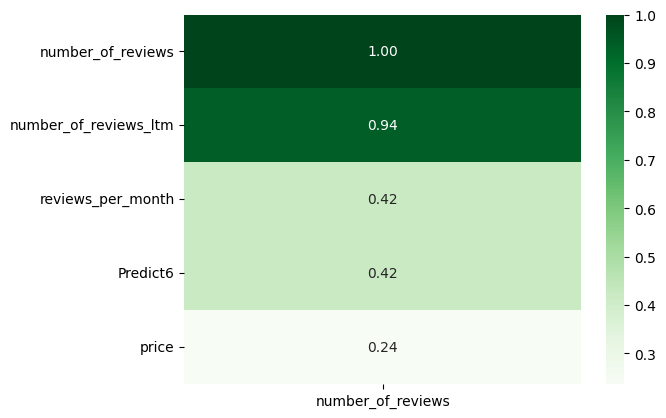

In [75]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map1

In [76]:
# Modelo original
df = df[df["room_type_num"] == 1]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
38,196253,2010,100.0,92.0,1.0,17,1,1,19.411080,-99.176340,...,330,7.0,0.06,991.0,1.0,27.0,4,3,4,1
86,196253,2010,100.0,92.0,1.0,17,1,1,19.413460,-99.177500,...,163,1.0,0.02,2808.0,1.0,18.0,4,3,3,1
90,2518152,2012,100.0,98.0,1.0,8,1,1,19.347350,-99.190160,...,365,28.0,0.22,991.0,1.0,40.0,15,3,4,2
103,2518152,2012,100.0,98.0,1.0,8,1,1,19.347230,-99.193960,...,365,57.0,0.45,991.0,1.0,41.0,15,3,4,2
124,3850198,2012,100.0,90.0,1.0,18,1,1,19.430590,-99.170730,...,318,25.0,0.18,991.0,1.0,22.0,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,546670717,2023,94.3,89.8,0.0,12,1,1,19.407307,-99.168103,...,58,0.0,1.13,1275.0,6.0,26.0,4,3,3,1
24771,546670717,2023,94.3,89.8,0.0,12,1,1,19.408753,-99.169915,...,58,0.0,1.13,1275.0,2.0,26.0,4,3,3,1
24775,546670717,2023,94.3,89.8,0.0,12,1,1,19.406960,-99.167850,...,175,0.0,1.13,5019.0,2.0,26.0,4,3,3,1
24776,546670717,2023,94.3,89.8,0.0,12,1,1,19.407240,-99.168210,...,175,0.0,1.13,5294.0,2.0,26.0,4,3,3,1


In [77]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.937383
number_of_reviews_l30d,0.558808
host_is_superhost,0.432555
reviews_per_month,0.420986
instant_bookable,0.295272
host_id,0.277153
accommodates,0.265310
maximum_nights_avg_ntm,0.258747
price,0.236587


<Axes: >

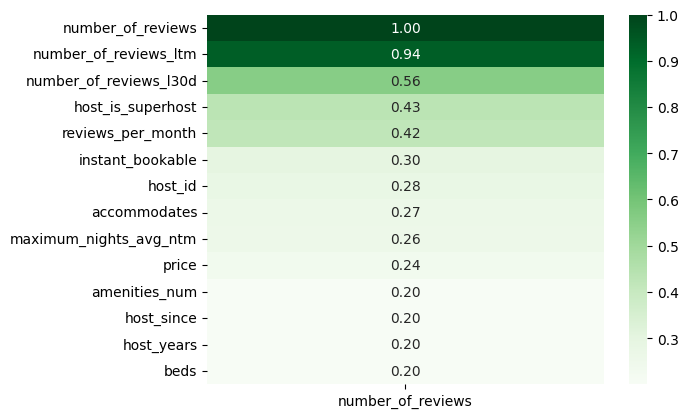

In [78]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

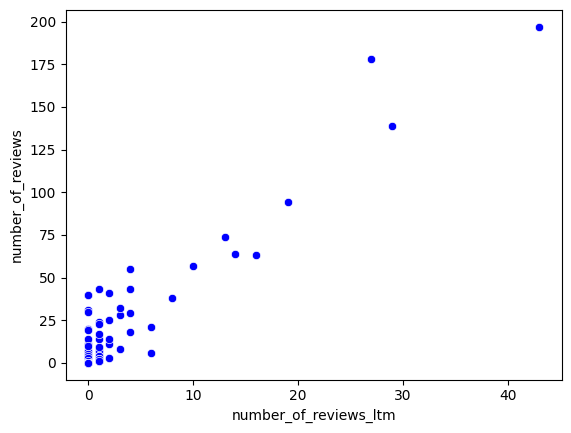

In [79]:
# Para "Hotel Room"
#El mejor modelo matemático simple que describe de mejor manera el número de reseñas es el siguiente:
from turtle import color
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = df_Hotel)

In [80]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df_Hotel[["number_of_reviews_ltm"]]
Var_Dep = df_Hotel[["number_of_reviews"]]

In [81]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[4.85312756]]),
 'rank_': 1,
 'singular_': array([65.45202222]),
 'intercept_': array([4.19297648])}

**Modelo matemático: Y = 4.85312756x + 4.19297648**

In [82]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "number_of_reviews_ltm"
y_pred = model.predict(X = df_Hotel[['number_of_reviews_ltm']])
y_pred
# Insertamos la columna de preddiciones en el df
df_Hotel.insert(6, 'PredictFinal', y_pred)
df_Hotel

,Predict1,Predict2,Predict3,Predict4,Predict5,Predict6,PredictFinal,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
38,92.042803,2458.543683,13.628988,4.955243,15.442470,4.732696,4.192976,1,92.0,100.0,5.0,5.0,991.0,330,7.0,0.06,5.0,0
86,92.042803,2458.543683,13.628988,4.955243,11.735869,4.723428,4.192976,1,92.0,100.0,5.0,5.0,2808.0,163,1.0,0.02,3.0,0
90,92.753259,2144.579341,15.391373,4.955243,16.219303,4.769770,18.752359,1,98.0,100.0,5.0,5.0,991.0,365,28.0,0.22,5.0,3
103,92.753259,2144.579341,15.391373,4.955243,16.219303,4.823062,52.724252,1,98.0,100.0,5.0,5.0,991.0,365,57.0,0.45,5.0,10
124,91.805985,2563.198464,13.041526,4.955243,15.176127,4.760501,13.899232,1,90.0,100.0,5.0,5.0,991.0,318,25.0,0.18,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,91.782303,2573.663942,12.982780,4.955243,9.405371,4.980622,4.192976,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24771,91.782303,2573.663942,12.982780,4.955243,9.405371,4.980622,4.192976,1,89.8,94.3,5.0,5.0,1275.0,58,0.0,1.13,5.0,0
24775,91.782303,2573.663942,12.982780,4.955243,12.002211,4.980622,4.192976,1,89.8,94.3,5.0,5.0,5019.0,175,0.0,1.13,5.0,0
24776,91.782303,2573.663942,12.982780,4.955243,12.002211,4.980622,4.192976,1,89.8,94.3,5.0,5.0,5294.0,175,0.0,1.13,5.0,0


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

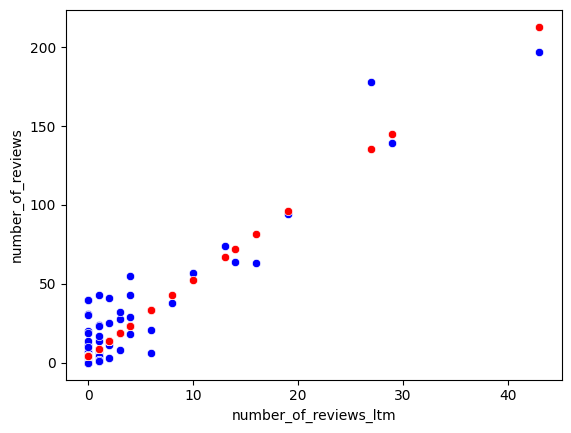

In [83]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = df_Hotel)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'PredictFinal', color = "red", data = df_Hotel)

In [84]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.9373829095847351